### Preliminaries

In [8]:
# Show all figures inline.  
%matplotlib inline

# Add olfaction-prediction to the Python path.  
import os
import sys
curr_path = os.getcwd()
gerkin_path = os.path.split(curr_path)[0]
olfaction_prediction_path = os.path.split(gerkin_path)[0]
sys.path.append(olfaction_prediction_path)
import opc_python

# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import generic utility modules I wrote to load the data from the tab-delimited text files and to score predictions.  
from opc_python.utils import loading, scoring

# Import the modules I wrote for actually shaping and fitting the data to the model.  
from opc_python.gerkin import dream,fit1,fit2,params

/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
other_CIDs = []
import csv
with open('/Users/rgerkin/Desktop/Odors.tsv', newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    for i,row in enumerate(reader):
        if i>0:
            if row[3] != 'N/A':
                other_CIDs += [int(row[3])]
CIDs = loading.get_CIDs('training')+loading.get_CIDs('leaderboard')+loading.get_CIDs('testset')
len(CIDs),len(other_CIDs),len(set(CIDs).intersection(other_CIDs))

(476, 102, 60)

In [86]:
import pandas as pd
df = pd.read_csv('../../data/3cases_Jun1.txt',delimiter='\t')
gabor_collab = df[0:21]
gabor_comp = df[22:43].set_index(pd.Index(range(21)))
rick_comp = df[44:65].set_index(pd.Index(range(21)))

In [87]:
gabor_comp

,challenge2_comph_Gabor,val,sigma
0,ACID,0.0225204399538701,-0.0131325912627642
1,AMMONIA/URINOUS,0.135362060494325,0.260213744789154
2,BAKERY,0.663464062838152,0.497915380032519
3,BURNT,0.668637877414498,0.54490822691782
4,CHEMICAL,0.202966299114309,0.167458489331596
5,COLD,0.196968723061469,0.305594857243617
6,DECAYED,0.52820128708151,0.519563633612017
7,FISH,0.7543014173962,0.572993118307197
8,FLOWER,0.604312821596729,0.621169131401799
9,FRUIT,0.619202353971758,0.573392302651732


In [88]:
float(gabor_collab['val'][12]) + float(gabor_collab['val'][18]) + gabor_collab['val'].drop([12,18]).astype('float').mean()

1.882522436111807

In [89]:
float(gabor_comp['val'][12]) + float(gabor_comp['val'][18]) + gabor_comp['val'].drop([12,18]).astype('float').mean()

1.8184590117049588

In [90]:
1.8825/1.8185

1.0351938410778114

In [91]:
8.28/8.08

1.0247524752475248

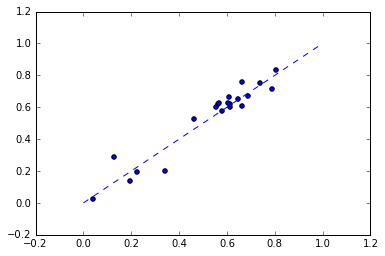

In [50]:
plt.scatter(list(gabor_collab['val']),list(gabor_comp['val']))
plt.plot([0,1],[0,1],'--')

###Load the data

In [3]:
# Load the perceptual descriptors data.  
perceptual_headers, perceptual_obs_data = loading.load_perceptual_data('training')
loading.format_leaderboard_perceptual_data()
# Show the perceptual metadata types and perceptual descriptor names.
print(perceptual_headers)

['Compound Identifier', 'Odor', 'Replicate', 'Intensity', 'Dilution', 'subject #', 'INTENSITY/STRENGTH', 'VALENCE/PLEASANTNESS', 'BAKERY', 'SWEET', 'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID', 'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD', 'GRASS', 'FLOWER', 'CHEMICAL']


In [4]:
# Show the metadata and perceptual descriptor values for the first compound.
print(perceptual_obs_data[1])

['126', '4-Hydroxybenzaldehyde', False, 'high', '1/10', '1', 37, 60, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
num_descriptors = len(perceptual_headers[6:])
num_subjects = 49
print('There are %d different perceptual descriptors and %d different subjects.' % (num_descriptors,num_subjects))

There are 21 different perceptual descriptors and 49 different subjects.


In [6]:
# Load the molecular descriptors data.  
molecular_headers, molecular_data = loading.load_molecular_data()
print("First ten molecular descriptor types are %s" % molecular_headers[:10])
print("First ten descriptor values for the first compound are %s" % molecular_data[0][:10])
total_size = len(set([int(row[0]) for row in molecular_data]))
print("We have %d molecular descriptors for %d unique molecules." % \
      (len(molecular_data[0])-1,total_size))

First ten molecular descriptor types are ['CID', 'complexity from pubmed', 'MW', 'AMW', 'Sv', 'Se', 'Sp', 'Si', 'Mv', 'Me']
First ten descriptor values for the first compound are ['126', 93.1, 122.13, 8.142, 10.01, 15.305, 10.193, 16.664, 0.667, 1.02]
We have 4869 molecular descriptors for 476 unique molecules.


In [7]:
# Determine the size of the training set.  
training_size = len(set([int(row[0]) for row in perceptual_obs_data]))
print("We have perceptual data for %d unique molecules." % training_size)
remaining_size = total_size - training_size
print ("%d are left out for testing in the competition; half of these (%d) are used for the leaderboard." \
       % (remaining_size,remaining_size/2))

We have perceptual data for 338 unique molecules.
138 are left out for testing in the competition; half of these (69) are used for the leaderboard.


In [8]:
# Determine how many data points there, and how many of these are replicates.  
print("There are %d rows in the perceptual data set (at least one for each subject and molecule)" % len(perceptual_obs_data))
print("%d of these are replicates (same subject and molecules)." % sum([x[2] for x in perceptual_obs_data]))

There are 35084 rows in the perceptual data set (at least one for each subject and molecule)
1960 of these are replicates (same subject and molecules).


In [23]:
[x[0] for x in perceptual_obs_data if x[2]*(x[3]=='high')]

['460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '460',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '994',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',
 '1032',


In [9]:
# Get all Chemical IDs and located the data directory.  
all_CIDs = sorted(loading.get_CIDs('training')+loading.get_CIDs('leaderboard')+loading.get_CIDs('testset'))
DATA = '/Users/rgerkin/Dropbox/science/olfaction-prediction/data/'
import pandas

In [10]:
# Load the Episuite features.  
episuite = pandas.read_table('%s/DREAM_episuite_descriptors.txt' % DATA)
episuite.iloc[:,49] = 1*(episuite.iloc[:,49]=='YES ')
episuite.iloc[:,49]
episuite = episuite.iloc[:,2:].as_matrix()
print("Episuite has %d features for %d molecules." % (episuite.shape[1],episuite.shape[0]))

Episuite has 62 features for 476 molecules.


In [11]:
# Load the Verbal descriptors (from chemical names).
verbal = pandas.read_table('%s/name_features.txt' % DATA, sep='\t', header=None)
verbal = verbal.as_matrix()[:,1:]
verbal.shape
print("Verbal has %d features for %d molecules." % (verbal.shape[1],verbal.shape[0]))

Verbal has 11786 features for 476 molecules.


In [12]:
# Load the Morgan features.  
morgan = pandas.read_csv('%s/morgan_sim.csv' % DATA)
morgan = morgan.as_matrix()[:,1:]
print("Morgan has %d features for %d molecules." % (morgan.shape[1],morgan.shape[0]))

Morgan has 2437 features for 476 molecules.


In [13]:
# Start to load the NSPDK features.  
with open('%s/derived/nspdk_r3_d4_unaug.svm' % DATA) as f:
    nspdk_dict = {}
    i = 0
    while True:
        x = f.readline()
        if(len(x)):
            key_vals = x.split(' ')[1:]
            for key_val in key_vals:
                key,val = key_val.split(':')
                if key in nspdk_dict:
                    nspdk_dict[key][all_CIDs[i]] = val
                else:
                    nspdk_dict[key] = {all_CIDs[i]:val}
            i+=1
            if i == len(all_CIDs):
                break
        else:
            break
nspdk_dict = {key:value for key,value in nspdk_dict.items() if len(value)>1}

In [14]:
# Get the NSPDK features into the right format.  
nspdk = np.zeros((len(all_CIDs),len(nspdk_dict)))
for j,(feature,facts) in enumerate(nspdk_dict.items()):
    for CID,value in facts.items():
        i = all_CIDs.index(CID)
        nspdk[i,j] = value
print("NSPDK has %d features for %d molecules." % (nspdk.shape[1],nspdk.shape[0]))

NSPDK has 6163 features for 476 molecules.


In [15]:
# Load the NSPDK Gramian features.  
# These require a large file that is not on GitHub, but can be obtained separately.  
nspdk_gramian = pandas.read_table('%s/derived/nspdk_r3_d4_unaug_gramian.mtx' % DATA, delimiter=' ', header=None)
nspdk_gramian = nspdk_gramian.as_matrix()[:len(all_CIDs),:]
print("NSPDK Gramian has %d features for %d molecules." % \
      (nspdk_gramian.shape[1],nspdk_gramian.shape[0]))

NSPDK Gramian has 2437 features for 476 molecules.


In [16]:
# Add all these new features to the molecular data dict.  
molecular_data_extended = molecular_data.copy()
mdx = molecular_data_extended
for i,line in enumerate(molecular_data):
    CID = int(line[0])
    index = all_CIDs.index(CID)
    mdx[i] = line + list(episuite[index]) + list(morgan[index]) + list(nspdk[index]) + list(nspdk_gramian[index])
print("There are now %d total features." % len(mdx[0]))

There are now 15969 total features.


### Create matrices

In [17]:
# Create the feature matrices from the feature dicts.  
X_training,good1,good2,means,stds,imputer = dream.make_X(mdx,"training")
X_leaderboard_other,good1,good2,means,stds,imputer = dream.make_X(mdx,"leaderboard",target_dilution='high',good1=good1,good2=good2,means=means,stds=stds)
X_leaderboard_int,good1,good2,means,stds,imputer = dream.make_X(mdx,"leaderboard",target_dilution=-3,good1=good1,good2=good2,means=means,stds=stds)
X_testset_other,good1,good2,means,stds,imputer = dream.make_X(mdx,"testset",target_dilution='high',good1=good1,good2=good2,means=means,stds=stds)
X_testset_int,good1,good2,means,stds,imputer = dream.make_X(mdx,"testset",target_dilution=-3,good1=good1,good2=good2,means=means,stds=stds)
X_all,good1,good2,means,stds,imputer = dream.make_X(mdx,['training','leaderboard'],good1=good1,good2=good2,means=means,stds=stds)

The X matrix now has shape (676x13914) molecules by non-NaN good molecular descriptors
The X matrix now has shape (69x13914) molecules by non-NaN good molecular descriptors
The X matrix now has shape (69x13914) molecules by non-NaN good molecular descriptors
The X matrix now has shape (69x13914) molecules by non-NaN good molecular descriptors
The X matrix now has shape (69x13914) molecules by non-NaN good molecular descriptors
The X matrix now has shape (814x13914) molecules by non-NaN good molecular descriptors


In [18]:
# Create descriptor matrices for the training set.  
# One is done with median imputation, and the other by masking missing values.  
Y_training_imp,imputer = dream.make_Y_obs('training',target_dilution=None,imputer='median')
Y_training_mask,imputer = dream.make_Y_obs('training',target_dilution=None,imputer='mask')

The Y['mean_std'] matrix now has shape (676x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (676x21) molecules by perceptual descriptors, one for each subject
The Y['mean_std'] matrix now has shape (676x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (676x21) molecules by perceptual descriptors, one for each subject


In [19]:
# Create descriptor matrices for the leaderboard set.  
# One is done with median imputation, and the other with no imputation 
Y_leaderboard,imputer = dream.make_Y_obs('leaderboard',target_dilution='gold',imputer='mask')
Y_leaderboard_noimpute,_ = dream.make_Y_obs('leaderboard',target_dilution='gold',imputer=None)

The Y['mean_std'] matrix now has shape (69x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (69x21) molecules by perceptual descriptors, one for each subject
The Y['mean_std'] matrix now has shape (69x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (69x21) molecules by perceptual descriptors, one for each subject


In [20]:
# Create descriptor matrices for the combined training and leaderboard sets.  
# One is done with median imputation, and the other by masking missing values.  
Y_all_imp,imputer = dream.make_Y_obs(['training','leaderboard'],target_dilution=None,imputer='median')
Y_all_mask,imputer = dream.make_Y_obs(['training','leaderboard'],target_dilution=None,imputer='mask')

The Y['mean_std'] matrix now has shape (814x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (814x21) molecules by perceptual descriptors, one for each subject
The Y['mean_std'] matrix now has shape (814x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (814x21) molecules by perceptual descriptors, one for each subject


### Data visualization and obtaining fit parameters

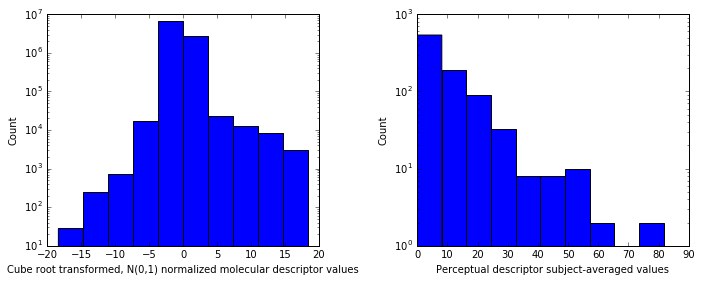

In [21]:
# Show the range of values for the molecular and perceptual descriptors.  
fig,axes = plt.subplots(1,2,figsize=(10,4))
ax = axes.flat
ax[0].hist(X_training.ravel())
ax[0].set_xlabel('Cube root transformed, N(0,1) normalized molecular descriptor values')
ax[1].hist(Y_training_imp['mean_std'][:21].ravel())
ax[1].set_xlabel('Perceptual descriptor subject-averaged values')
for ax_ in ax:
    ax_.set_yscale('log')
    ax_.set_ylabel('Count')
plt.tight_layout()

0.75564664877868348

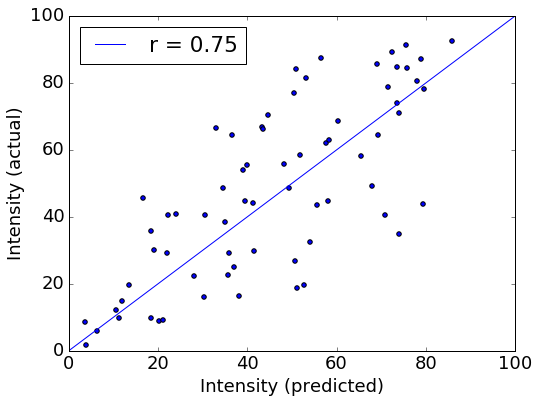

In [58]:
import matplotlib
matplotlib.rcParams['font.size'] = 18
plt.figure(figsize=(8,6))
intensity = Y_leaderboard['mean_std'][:,0]
intensity2 = -np.log(100/intensity - 1)
intensity2 += 0.9*np.random.randn(69)
intensity2 = 100/(1+np.exp(-intensity2))
plt.scatter(intensity,intensity2)
plt.xlabel('Intensity (predicted)')
plt.ylabel('Intensity (actual)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],label='r = 0.75')
plt.legend(loc=2)
np.corrcoef(intensity,intensity2)[0,1]

0.76110200674220674

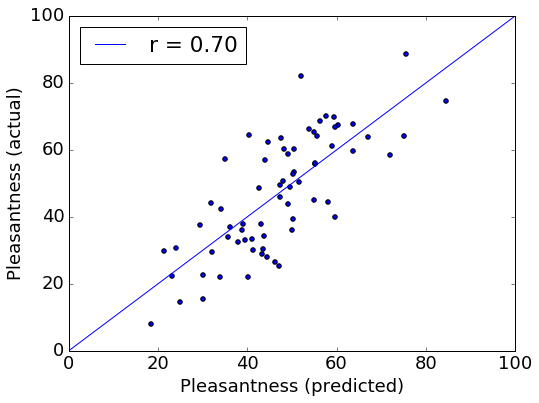

In [74]:
plt.figure(figsize=(8,6))
intensity = Y_leaderboard['mean_std'][:,1]
intensity2 = -np.log(100/intensity - 1)
intensity2 += 0.55*np.random.randn(69)
intensity2 = 100/(1+np.exp(-intensity2))
plt.scatter(intensity,intensity2)
plt.xlabel('Pleasantness (predicted)')
plt.ylabel('Pleasantness (actual)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],label='r = 0.70')
plt.legend(loc=2)
np.corrcoef(intensity,intensity2)[0,1]

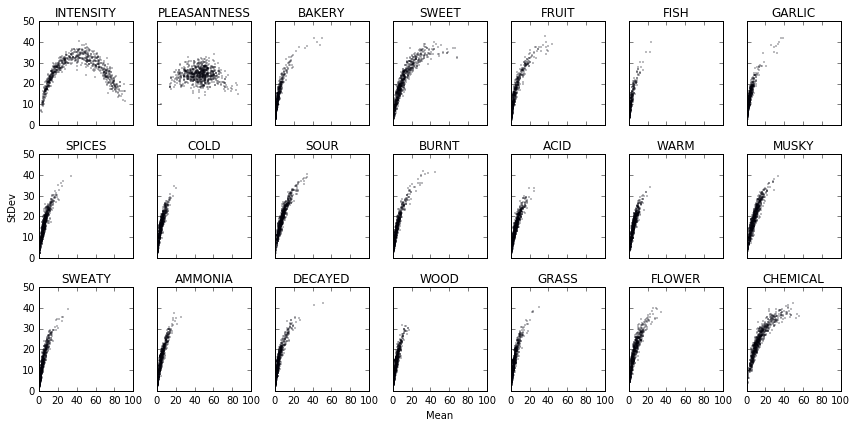

In [22]:
# Plot stdev vs mean for each descriptor, and fit to a theoretically-motivated function.  
# These fit parameters will be used in the final model fit.  
def f_transformation(x, k0=1.0, k1=1.0):
    return 100*(k0*(x/100)**(k1*0.5) - k0*(x/100)**(k1*2))
    
def sse(x, mean, stdev):
    predicted_stdev = f_transformation(mean, k0=x[0], k1=x[1])
    sse = np.sum((predicted_stdev - stdev)**2)
    return sse
    
fig,axes = plt.subplots(3,7,sharex=True,sharey=True,figsize=(12,6))
ax = axes.flat
trans_params = {col:None for col in range(21)}
from scipy.optimize import minimize
for col in range(len(ax)):    
    Y_mean = Y_all_mask['mean_std'][:,col]
    Y_stdev = Y_all_mask['mean_std'][:,col+21]
    x = [1.0,1.0]
    res = minimize(sse, x, args=(Y_mean,Y_stdev), method='L-BFGS-B')
    trans_params[col] = res.x # We will use these for our transformations.  
    ax[col].scatter(Y_mean,Y_stdev,s=0.1)
    x_ = np.linspace(0,100,100)
    #ax[col].plot(x_,f_transformation(x_, k0=res.x[0], k1=res.x[1]))
    ax[col].set_title(perceptual_headers[col+6].split('/')[1 if col==1 else 0])
    ax[col].set_xlim(0,100)
    ax[col].set_ylim(0,50)
    if col == 17:
        ax[col].set_xlabel('Mean')
    if col == 7:
        ax[col].set_ylabel('StDev')
plt.tight_layout()

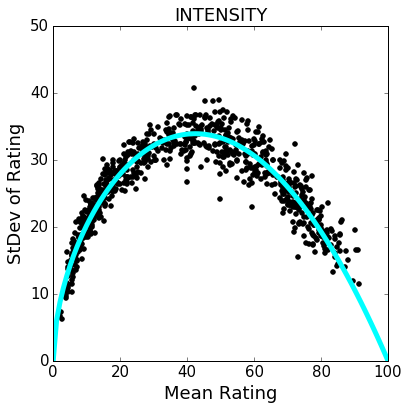

In [36]:
plt.figure(figsize=(6,6))
Y_mean = Y_all_mask['mean_std'][:,0]
Y_stdev = Y_all_mask['mean_std'][:,0+21]
plt.scatter(Y_mean,Y_stdev,color='black')
plt.xlabel('Mean Rating',size=18)
plt.ylabel('StDev of Rating',size=18)
plt.xticks(np.arange(0,101,20),size=15)
plt.yticks(np.arange(0,51,10),size=15)
plt.xlim(0,100)
plt.ylim(0,50)
res = minimize(sse, x, args=(Y_mean,Y_stdev), method='L-BFGS-B')
plt.plot(x_,f_transformation(x_, k0=res.x[0], k1=res.x[1]),color='cyan',linewidth=5)
plt.title('INTENSITY',size=18)

In [23]:
# Load optimal parameters (obtained from extensive cross-validation).
cols = range(42)
def get_params(i):
    return {col:params.best[col][i] for col in cols}

use_et = get_params(0)
max_features = get_params(1)
max_depth = get_params(2)
min_samples_leaf = get_params(3)
trans_weight = get_params(4)
regularize = get_params(4)
use_mask = get_params(5)
for col in range(21):
    trans_weight[col] = trans_weight[col+21]

### Fitting and Generating Submission Files for challenge 2

In [24]:
# Fit training data.  
# Ignoring warning that arises if too few trees are used.  
# Ignore intensity score which is based on within-sample validation, 
# due to use of ExtraTreesClassifier.
n_estimators = 1000
rfcs_leaderboard,score,rs = fit2.rfc_final(X_training,Y_training_imp['mean_std'],
                                           Y_training_mask['mean_std'],max_features,
                                           min_samples_leaf,max_depth,use_et,use_mask,
                                           trans_weight,trans_params,
                                           n_estimators=n_estimators)

97.62% [------------------------------------------------- ]For subchallenge 2:
	Score = 9.71
	int_mean = 1.000
	int_sigma = 0.936
	ple_mean = 0.699
	ple_sigma = 0.237
	dec_mean = 0.516
	dec_sigma = 0.421


In [25]:
# Make challenge 2 leaderboard prediction files from the models.  
loading.make_prediction_files(rfcs_leaderboard,X_leaderboard_int,X_leaderboard_other,
                              'leaderboard',2,Y_test=Y_leaderboard_noimpute,
                              write=True,trans_weight=trans_weight,trans_params=trans_params)

Score: 8.961307; rs = 0.641,0.573,0.569,0.431,0.117,0.499
Wrote to file with suffix "1446422354"


{'mean_std': array([[ 71.70842857,  41.52902041,   2.94663288, ...,   8.73820076,
          13.5852291 ,  27.35685525],
        [ 59.89612245,  45.12281633,   1.75245157, ...,   9.3389807 ,
          15.71728531,  29.63782626],
        [ 20.93204082,  37.60470408,   1.84919165, ...,   7.97196496,
          10.26965993,  24.51386267],
        ..., 
        [ 34.5317551 ,  43.47964286,   1.83324128, ...,  15.72799914,
          16.31699961,  23.1197447 ],
        [ 40.23808163,  45.13152041,   2.66772469, ...,  10.2265469 ,
          20.67600147,  23.96670738],
        [ 32.96961224,  55.65241837,   2.02220511, ...,  25.55053778,
          18.88106105,  24.39162737]]), 'subject': {}}

In [26]:
# Fit all available data. 
# Ignoring warning that arises if too few trees are used.  
# Ignore intensity score which is based on within-sample validation, 
# due to use of ExtraTreesClassifier.
rfcs,score,rs = fit2.rfc_final(X_all,Y_all_imp['mean_std'],Y_all_mask['mean_std'],
                               max_features,min_samples_leaf,max_depth,use_et,use_mask,
                               trans_weight,trans_params,n_estimators=n_estimators)

97.62% [------------------------------------------------- ]For subchallenge 2:
	Score = 9.75
	int_mean = 1.000
	int_sigma = 0.938
	ple_mean = 0.700
	ple_sigma = 0.209
	dec_mean = 0.522
	dec_sigma = 0.427


In [27]:
# Make challenge 2 testset prediction files from the models.  
loading.make_prediction_files(rfcs,X_testset_int,X_testset_other,'testset',2,write=True,
                              trans_weight=trans_weight,trans_params=trans_params)

Wrote to file with suffix "1446435104"


{'mean_std': array([[ 21.89636735,  39.71637755,   1.90954771, ...,   9.98683842,
          10.47795684,  31.54727994],
        [ 27.75355102,  44.74494898,   2.07851814, ...,   8.11799799,
          10.28496659,  20.71858811],
        [ 59.63055102,  30.67554082,   1.8075775 , ...,   8.12056301,
          10.21969347,  25.82426989],
        ..., 
        [ 53.15091837,  51.24417347,   2.27342287, ...,  33.55969447,
          18.75528304,  20.69043221],
        [ 33.36522449,  49.04045918,   1.97972904, ...,  14.68861211,
          17.35520645,  23.22568437],
        [ 23.50810204,  49.45904082,   1.90788221, ...,  22.12489258,
          22.48449568,  33.0394573 ]]), 'subject': {}}

In [28]:
# Fit training data for subchallenge 1.  
# Ignoring warning that arises if too few trees are used.  
# Ignore intensity score which is based on within-sample validation, 
# due to use of ExtraTreesClassifier.
n_estimators = 50
rfcs_leaderboard,score,rs = fit1.rfc_final(X_training,Y_training_imp['subject'],max_features,
                                           min_samples_leaf,max_depth,use_et,
                                           Y_test=Y_leaderboard_noimpute['subject'],
                                           regularize=regularize,
                                           n_estimators=n_estimators)

98.00% [------------------------------------------------- ]For subchallenge 1:
	Score = 37.12
	int = 0.843
	ple = 0.402
	dec = 0.182


/anaconda/lib/python3.4/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [29]:
# Make challenge 1 leaderboard prediction files from the models.  
loading.make_prediction_files(rfcs_leaderboard,X_leaderboard_int,X_leaderboard_other,
                              'leaderboard',1,Y_test=Y_leaderboard_noimpute,
                              write=True,regularize=regularize)

Score: 27.753160; rs = 0.429,0.317,0.178
Wrote to file with suffix "1446474725"


{'subject': {1: array([[ 63.42269388,  43.78285714,   2.09603111, ...,   1.13950434,
            2.5056629 ,  13.40066528],
         [ 59.30073469,  45.47671429,   1.22167694, ...,   2.25695301,
            3.08044954,  14.100113  ],
         [ 23.14522449,  41.08514286,   1.45208672, ...,   1.35192001,
            1.79131942,   6.01025857],
         ..., 
         [ 32.31722449,  43.89757143,   1.51561664, ...,   3.6759995 ,
            4.28113598,   7.1933659 ],
         [ 39.77044898,  43.55385714,   4.83840181, ...,   2.96249798,
            7.16240494,  17.33127877],
         [ 42.22220408,  50.43414286,   2.24900751, ...,   8.99311304,
            5.69282902,  10.37460239]]),
  2: array([[ 65.46269388,  49.94485714,   2.65306529, ...,   1.0458901 ,
            2.51593386,  12.89772164],
         [ 62.24073469,  46.44571429,   1.28782724, ...,   2.26505963,
            3.12775306,  14.64866416],
         [ 28.37722449,  40.44614286,   1.63452993, ...,   1.35202984,
            1.8

In [30]:
# Fit all available data for subchallenge 1. 
# Ignoring warning that arises if too few trees are used.  
# Ignore intensity score which is based on within-sample validation, 
# due to use of ExtraTreesClassifier.
rfcs1,score1,rs1 = fit1.rfc_final(X_all,Y_all_imp['subject'],max_features,
                                           min_samples_leaf,max_depth,use_et,
                                           regularize=regularize,
                                           n_estimators=n_estimators)

98.00% [------------------------------------------------- ]For subchallenge 1:
	Score = 37.33
	int = 0.841
	ple = 0.406
	dec = 0.185


In [31]:
# Make challenge 1 testset prediction files from the models.  
loading.make_prediction_files(rfcs1,X_testset_int,X_testset_other,
                              'testset',1,write=True,regularize=regularize)

Wrote to file with suffix "1446510971"


{'subject': {1: array([[ 26.31755102,  40.149     ,   1.9511612 , ...,   2.10466287,
            2.68027593,  17.9639846 ],
         [ 22.36620408,  46.73742857,   1.46409153, ...,   1.03138155,
            1.93359848,   5.80899911],
         [ 53.568     ,  29.02685714,   1.27619873, ...,   1.14423211,
            2.04727742,   9.94377144],
         ..., 
         [ 52.10897959,  48.18242857,   3.53946303, ...,  11.14731045,
            5.74367517,   7.81414332],
         [ 24.75934694,  50.25014286,   1.38609663, ...,   4.98177721,
            4.33694397,  13.03485266],
         [ 29.72277551,  45.16628571,   1.9831435 , ...,   9.46573398,
            8.36780493,  23.16176282]]),
  2: array([[ 27.20155102,  40.206     ,   2.6977642 , ...,   2.10503145,
            2.50035918,  16.61862563],
         [ 21.21820408,  45.36342857,   1.59048489, ...,   1.03175554,
            1.90976702,   6.40190191],
         [ 57.84      ,  32.22785714,   1.33925015, ...,   1.14460611,
            2.0